# 3. Unintegrated five pancreas dataset

In [ ]:
%pip install --quiet umap
%pip install --quiet scanpy
%pip install --quiet 'scanpy[leiden]'
%pip install --quiet louvain
%pip install --quiet pynndescent==0.5.8

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import sys
sys.path.append('./src')
import utils as my_u
from utils import data_transformation
from utils import clustering
from utils import h5_data_loader
#import scanpy.api as sc
import anndata as ad
import scanpy as sc
import logging
import numpy as np
from sklearn.decomposition import PCA
from sklearn import preprocessing
from sklearn.metrics.cluster import normalized_mutual_info_score
from sklearn.metrics.cluster import adjusted_rand_score
import umap
import seaborn as sns


In [ ]:
from palettes import vega_20
print(vega_20)
scanpy = vega_20[::2]+vega_20[1::2]

import seaborn as sns
sns.color_palette(scanpy)

In [3]:
datasets = ['./dataset/baron_sc.h5', './dataset/muraro_sc.h5', './dataset/segerstolpe_sc.h5', './dataset/wang_sc.h5', './dataset/xin_sc.h5']
label_filter = ['epsilon', 'alpha', 'beta', 'duct', 'activated', 'schwann', 'gamma', 'quiescent', 'delta', 'macrophage', 'endothelial', 'acinar', 'mast']
transformations = ['raw']

In [ ]:
X_, y_, b_, file_names = h5_data_loader(datasets, label_filter)
logging.info(f'Data loaded. {datasets}')

adata = ad.AnnData(X_, dtype=np.int32)
adata.obs["label"] = y_
#adata.obs["batch"] = b_
batch_key = "batch"
label_key = "label"                                                                                                                           
adata.uns[batch_key + "_colors"] = [ 
    "#1b9e77",
    "#d95f02",
    "#7570b3",
    "#999999",
    "#ff00ff",
]  # Set custom colours for batches

sc.pp.filter_genes(adata, min_cells=1)
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
sc.pp.highly_variable_genes(adata)
sc.tl.pca(adata)
sc.pp.neighbors(adata)

## Unintegrated result (HVG)

Conventional HVG analysis is done on five pancreas datasets.

In [ ]:
true = adata.obs["label"]
best = (0,0,0,0)
for res in np.arange(0.1, 3.01, 0.1):
    sc.tl.louvain(adata, resolution = res, key_added = "louvain_"+str(res))
    pred = adata.obs['louvain_'+str(res)]
    nmi = normalized_mutual_info_score(pred, true, average_method="arithmetic")
    label_ari = adjusted_rand_score(pred, y_)
    #batch_ari = adjusted_rand_score(pred, b_)
    if best[1] < nmi:
        best = (res, nmi, -1, label_ari)
print(best)


(0.4, 0.7230905514108777, -1, 0.46269825891179667)


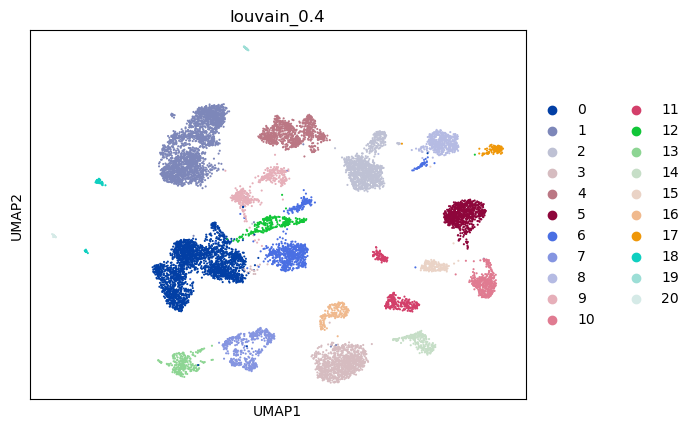

In [ ]:
sc.tl.umap(adata, init_pos='spectral')
sc.pl.umap(adata, color=['louvain_0.4'])

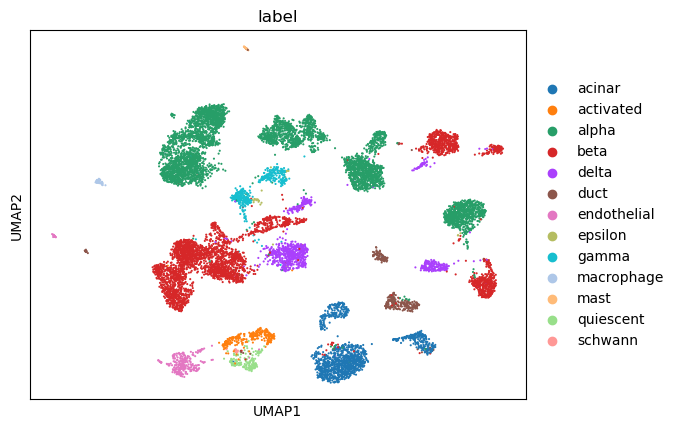

In [ ]:
sc.pl.umap(adata, color=['label'])